# CS4650.02 : Capstone Project

## Members : Linh B. San

### Analysis medical cost dataset found from Kaggle and use Linear Regression to make predictions on insurance cost.

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
#Read data

data = pd.read_csv('insurance.csv')

data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Analyze and examine the dataset

In [176]:
data.shape

(1338, 7)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [178]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [179]:
#Describe only got numneric data, so we use describe(include='object') to get categorical description
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


### Clean the dataset

In [180]:
#Handle duplicated data
data.duplicated().sum()

1

In [181]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [182]:
data.drop(index=[581], inplace=True)

In [183]:
#Handle Null data
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Prep data for visualization and visualize it

In [184]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [185]:
#Seperate categorical and numerical data
num_list = ['age', 'bmi', 'charges']

cat_list = ['sex', 'children','smoker', 'region']

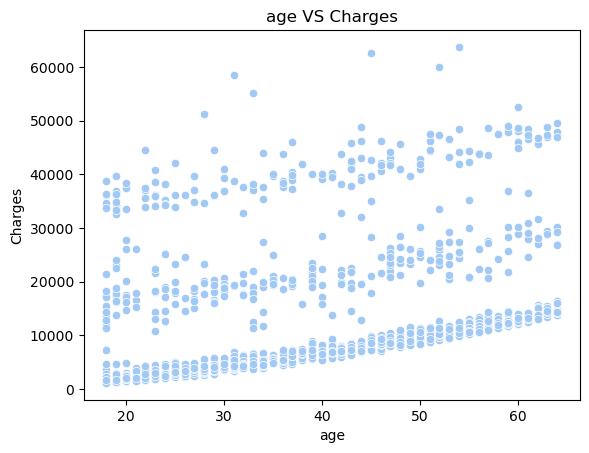

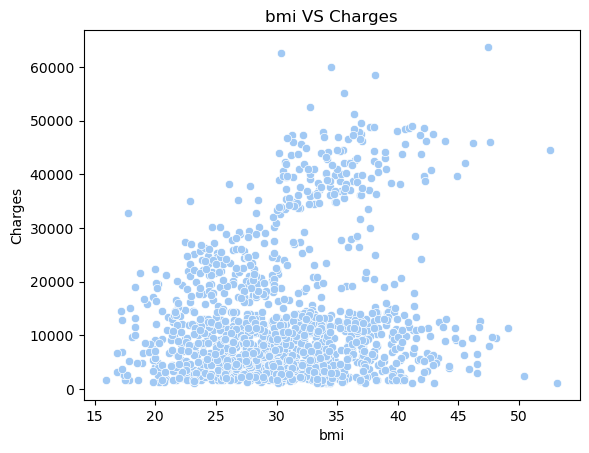

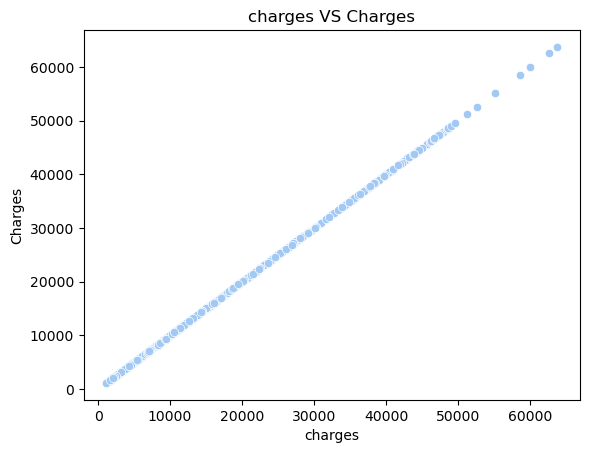

In [186]:
sns.set_palette('pastel')

def scatterplot_for_num(data, x_col, y_col):
    sns.scatterplot(x=data[x_col], y=data['charges'], data=data)
    plt.title(f'{x_col} VS Charges')
    plt.xlabel(f'{x_col}')
    plt.ylabel('Charges')
    plt.show()

for x_col in num_list:
    scatterplot_for_num(data, x_col, 'charges')

The scatterplot above shows that the age and charge has somewhat of a positive linear relationship. As for the bmi and charges plot, it was a bit hard to tell. 

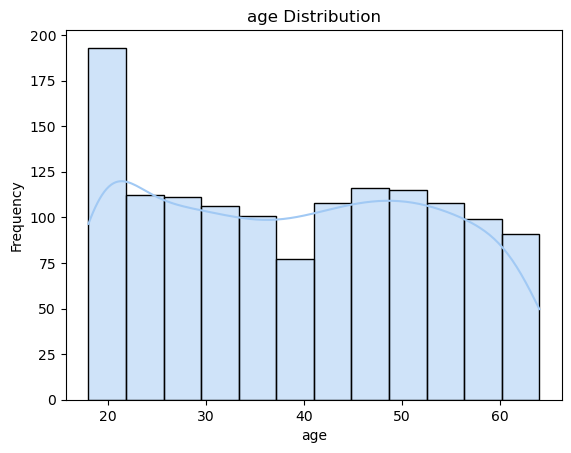

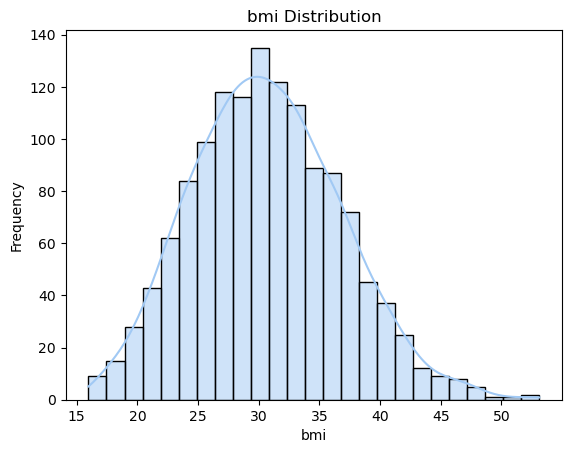

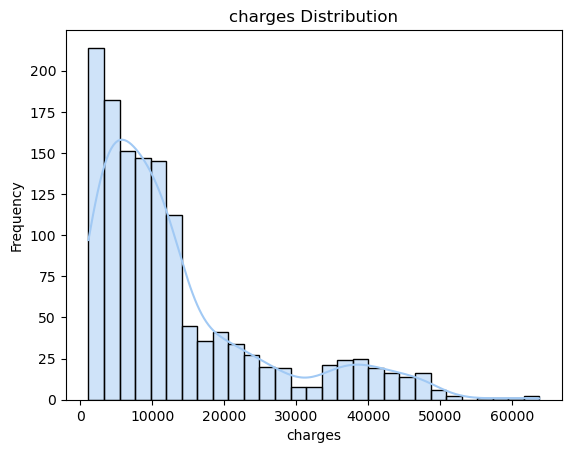

In [187]:
def histplot_for_num(feat):
    sns.histplot(data[feat], kde=True)
    plt.title(f"{feat} Distribution")
    plt.xlabel(f"{feat}")
    plt.ylabel("Frequency")
    plt.show()
    
for feat in num_list:
    histplot_for_num(feat)

The distrubtion of the age group in our dataset is somewhat uniform while the bmi follows a normal distribution. The charges shows that it is positively skewed to the right. 

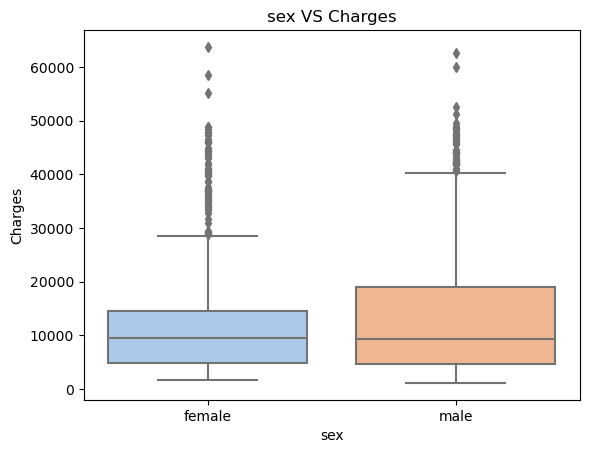

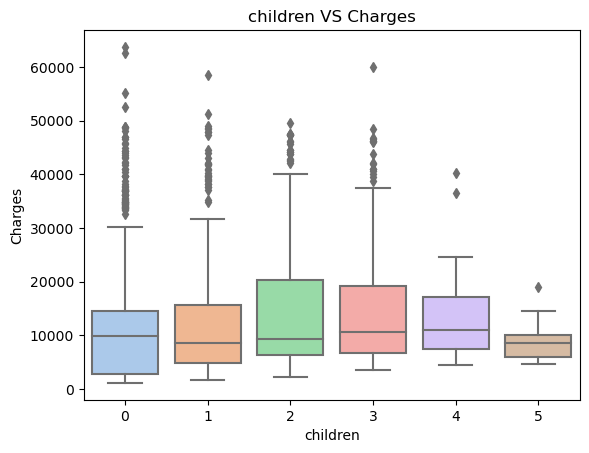

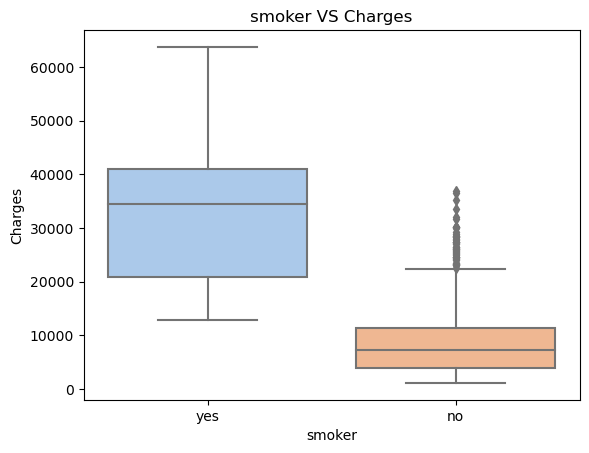

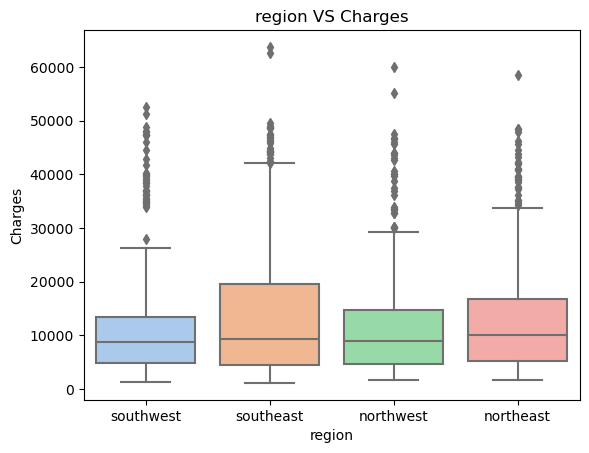

In [188]:
def boxplot_for_cat(data, x_col, y_col):
    sns.boxplot(x=data[x_col], y=data['charges'], data=data)
    plt.title(f'{x_col} VS Charges')
    plt.xlabel(f'{x_col}')
    plt.ylabel('Charges')
    plt.show()

for x_col in cat_list:
    boxplot_for_cat(data, x_col, 'charges')

From these boxplots we can see that our dataset has some outliers. However we do not know if this will affect the dataset negatively as some outliers can help contribute to our model's performance. Therefore, we will keep the dataset as it is now. 

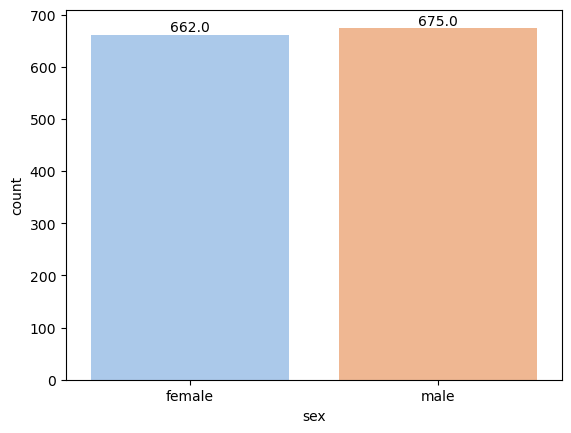

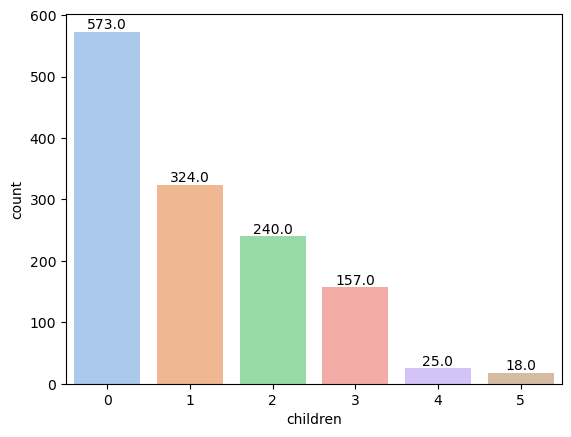

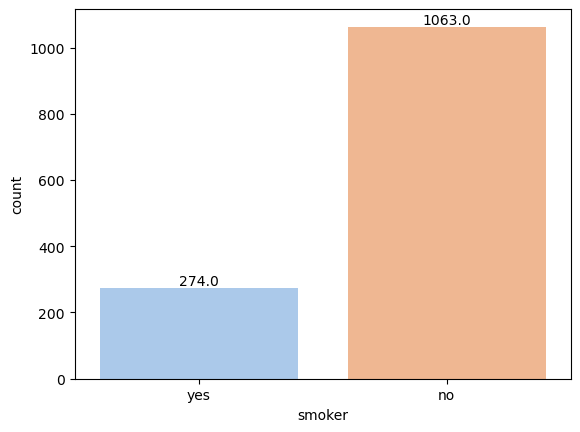

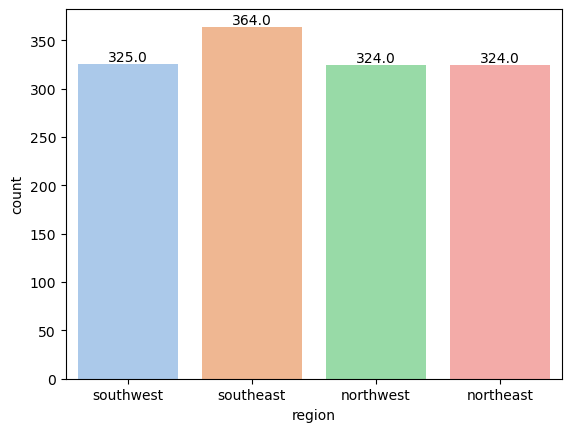

In [189]:
def countplot_for_cat(data, x_col):
    ax = sns.countplot(x=x_col, data=data)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    
    plt.xlabel(x_col)
    plt.show()

for x_col in cat_list:
    countplot_for_cat(data, x_col)

Based on the graphs we can see that we have roughly even amount of male to female ratio as well as region wise. In the children graph we can see that there is a higher numeber of people without children and that there is a negative linear relationship with the amount of children people have from 0-5. As for the smoker chart we can see there is a high number of non-smokers with a 79.5% vs smokers with a 20.49%. 

### Linear Regression

In [190]:
#Import additional libraries for this
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [191]:
#Convert categorical datasets to fit our model
cat_list.remove('children')
cat_list.remove('sex')

data['sex'] = data['sex'].map({'male': 0, 'female': 1})

new_df = pd.get_dummies(data, columns=cat_list, drop_first=True)
new_df

,age,sex,bmi,children,charges,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,16884.92400,1,0,0,1
1,18,0,33.770,1,1725.55230,0,0,1,0
2,28,0,33.000,3,4449.46200,0,0,1,0
3,33,0,22.705,0,21984.47061,0,1,0,0
4,32,0,28.880,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,10600.54830,0,1,0,0
1334,18,1,31.920,0,2205.98080,0,0,0,0
1335,18,1,36.850,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,2007.94500,0,0,0,1


<Axes: >

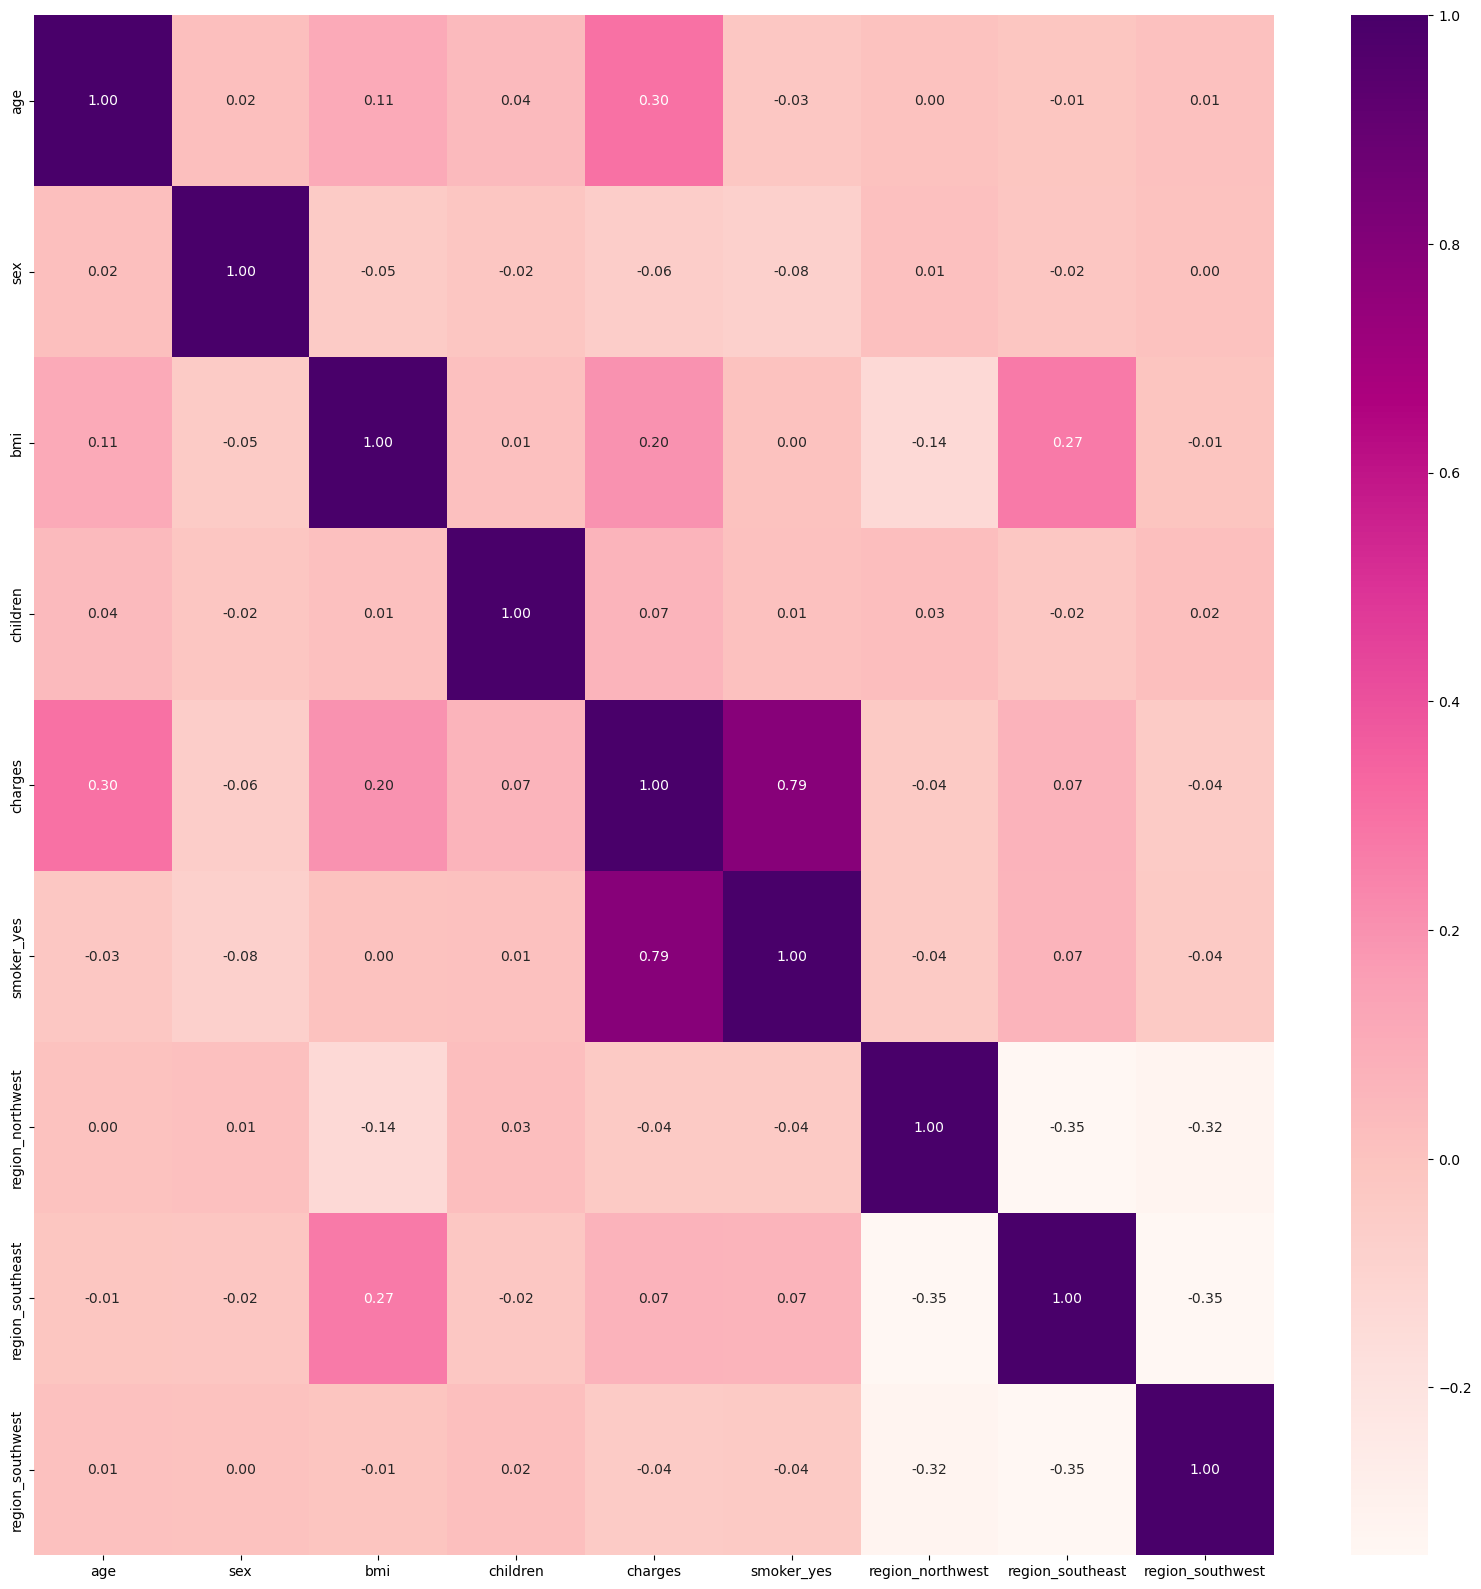

In [192]:
#Find correlation within the dataset with heatmap
plt.figure(figsize=(20, 20))
corr_data = new_df.corr()
sns.heatmap(corr_data, cmap='RdPu', annot=True, fmt='.2f')

In [193]:
new_df.columns

Index(['age', 'sex', 'bmi', 'children', 'charges', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [194]:
#Prep data for linear regression, remove charge from the dataset to train X
new_df = new_df.drop(columns='charges').join(data['charges'])
new_df

,age,sex,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest,charges
0,19,1,27.900,0,1,0,0,1,16884.92400
1,18,0,33.770,1,0,0,1,0,1725.55230
2,28,0,33.000,3,0,0,1,0,4449.46200
3,33,0,22.705,0,0,1,0,0,21984.47061
4,32,0,28.880,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,0,0,10600.54830
1334,18,1,31.920,0,0,0,0,0,2205.98080
1335,18,1,36.850,0,0,0,1,0,1629.83350
1336,21,1,25.800,0,0,0,0,1,2007.94500


In [195]:
all_features = new_df.columns.tolist()[:-1]

In [196]:
print(all_features)

['age', 'sex', 'bmi', 'children', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


In [197]:
X = new_df[all_features]
y = new_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

scaler = StandardScaler()
scaler.fit(X_train)  
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error (MAE): 4322.626467422824
Mean Squared Error (MSE): 39953600.81882043
Root Mean Squared Error (RMSE): 6320.88607861433
R-squared: 0.7456807491583332


Our model did not perform too bad, however it did not perform well etiher. As seen previously we had some outliers, lets handle the outliers to see if our model would perform better.

In [198]:
def replace_outliers_with_median(data):
    for column in data.columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        IQR = q3 - q1
        
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        
        data[column][(data[column] < lower_bound) | (data[column] > upper_bound)] = data[column].median()
    
    return data

median_df = replace_outliers_with_median(new_df)


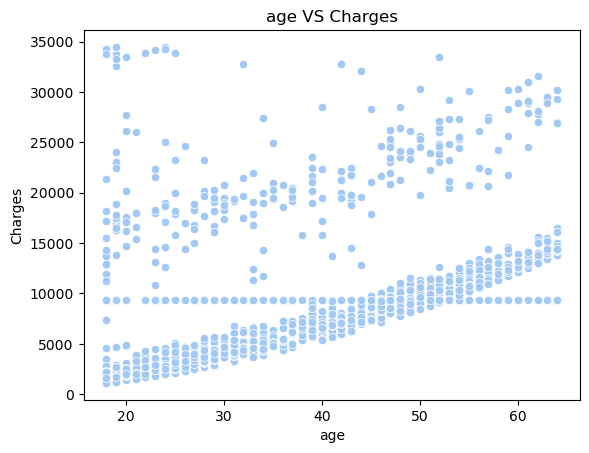

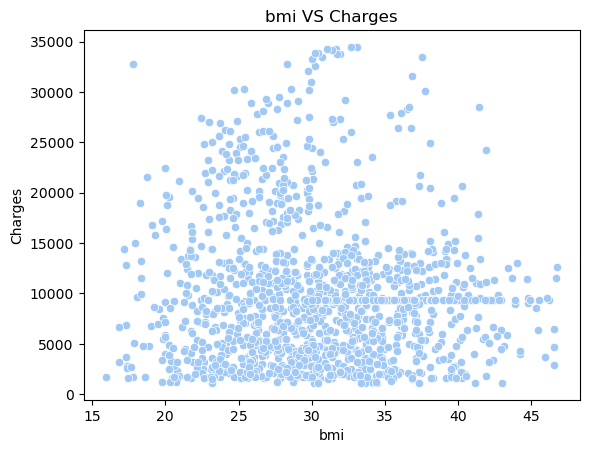

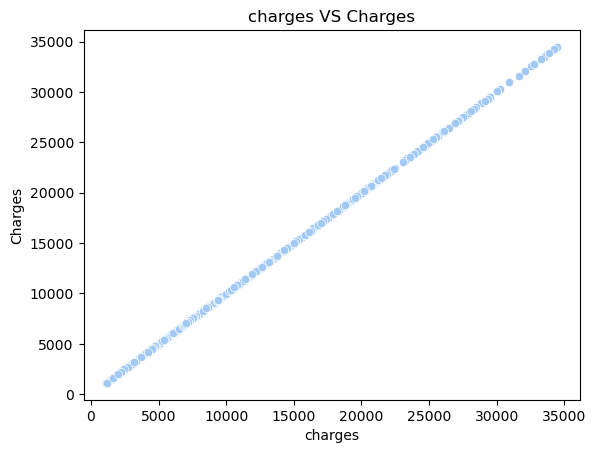

In [199]:
def scatterplot_for_num(data, x_col, y_col):
    sns.scatterplot(x=data[x_col], y=data['charges'], data=data)
    plt.title(f'{x_col} VS Charges')
    plt.xlabel(f'{x_col}')
    plt.ylabel('Charges')
    plt.show()

for x_col in num_list:
    scatterplot_for_num(median_df, x_col, 'charges')

When we compare this new scatterplot with the previous scatterplot we can see that the outliers were somewhat handled. Now lets do the linear regression again to see if this improved our model. 

In [200]:
X_m = median_df[all_features]
y_m = median_df['charges']

X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, test_size=0.3, random_state=0)

scaler = StandardScaler()
scaler.fit(X_m_train)  
scaled_X_m_train = scaler.transform(X_m_train)
scaled_X_m_test = scaler.transform(X_m_test)

model_m = LinearRegression()
model_m.fit(scaled_X_m_train, y_m_train)
y_m_pred = model_m.predict(scaled_X_m_test)

mae_m = metrics.mean_absolute_error(y_m_test, y_m_pred)
mse_m = metrics.mean_squared_error(y_m_test, y_m_pred)
rmse_m = np.sqrt(mse)
r2_m = metrics.r2_score(y_m_test, y_m_pred)


print(f'Mean Absolute Error (MAE): {mae_m}')
print(f'Mean Squared Error (MSE): {mse_m}')
print(f'Root Mean Squared Error (RMSE): {rmse_m}')
print(f'R-squared: {r2_m}')

Mean Absolute Error (MAE): 4823.537009151855
Mean Squared Error (MSE): 45547829.92561908
Root Mean Squared Error (RMSE): 6320.88607861433
R-squared: 0.14319425852265721


The MAE, RMSE, and MSE stayed relatively the same however the R2 score seems to have signigicantly decreased. This shows that the IQR stragtegy used to handle the outliers is not suitable for this dataset and that the outliers have impactful information that can contribute to our model's performance. 

### Compare our resutls

In [201]:
def compare(y_test, y_pred):
    compare = pd.DataFrame()
    compare["Actual"] = y_test
    compare["Predict"] = y_pred
    compare["compare"] = abs(y_test-y_pred)
    return compare

compare(y_test,y_pred)

,Actual,Predict,compare
1231,20167.33603,22499.990056,2332.654026
769,6933.24225,4738.703110,2194.539140
847,2438.05520,10963.750966,8525.695766
510,11763.00090,13759.214264,1996.213364
363,2597.77900,2081.791745,515.987255
...,...,...,...
1174,4433.91590,6941.417325,2507.501425
204,7147.10500,6230.857293,916.247707
553,11187.65670,13052.104254,1864.447554
516,27724.28875,4415.113265,23309.175485


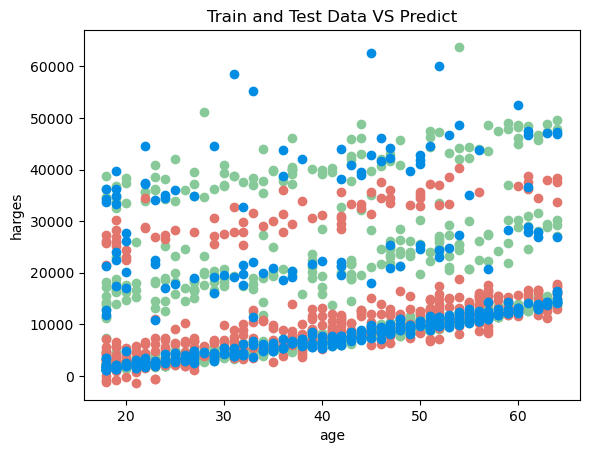

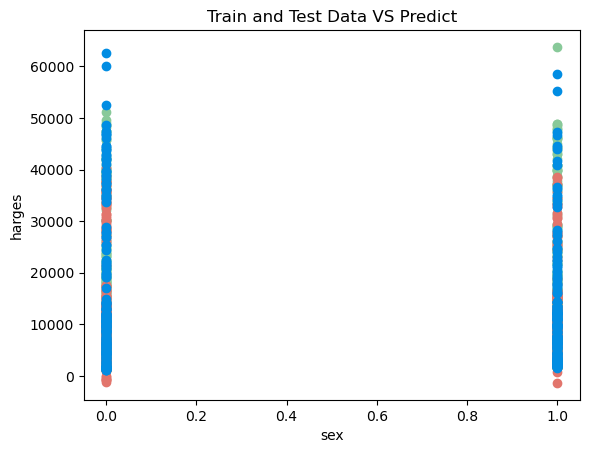

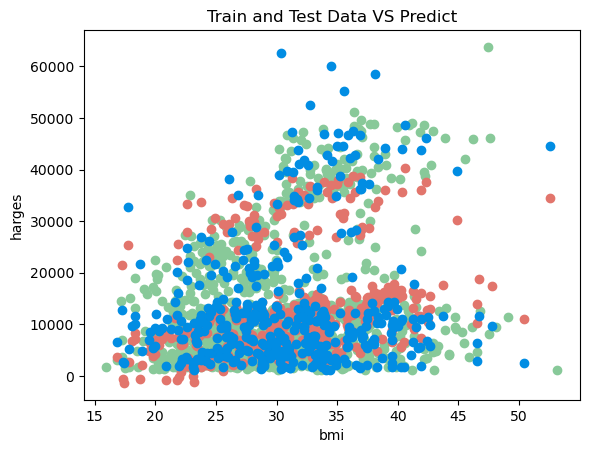

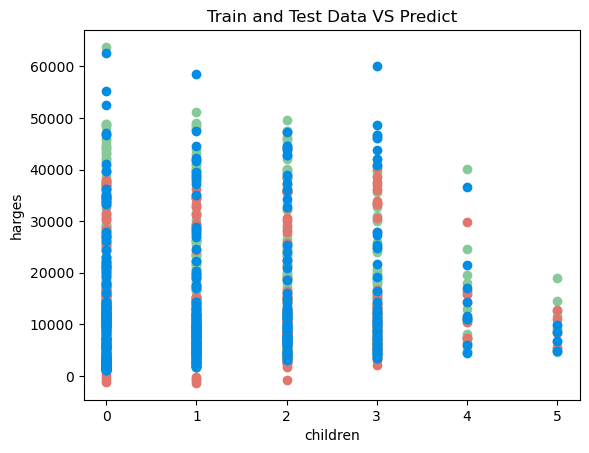

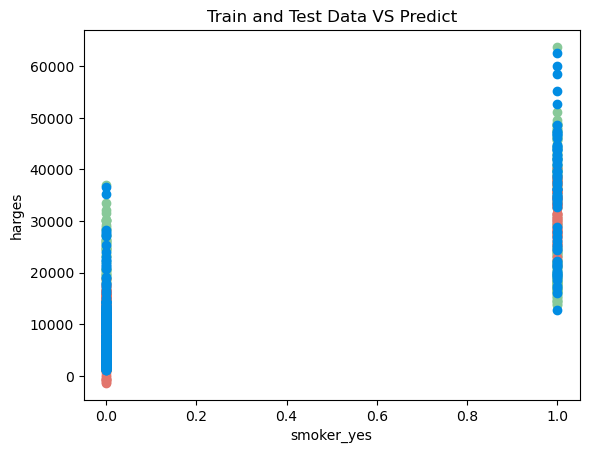

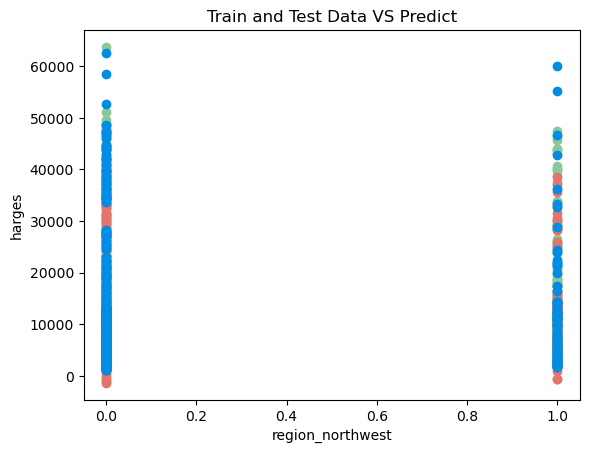

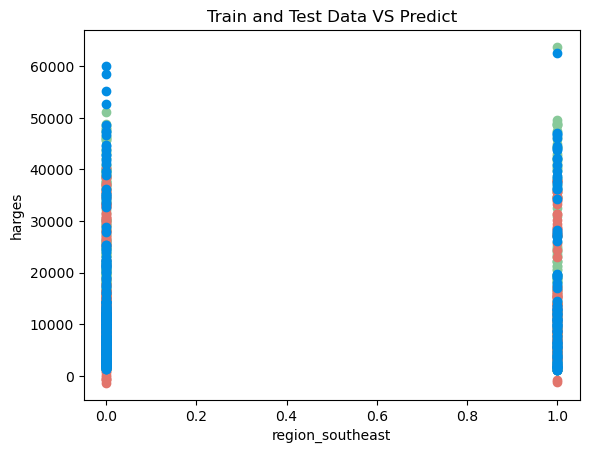

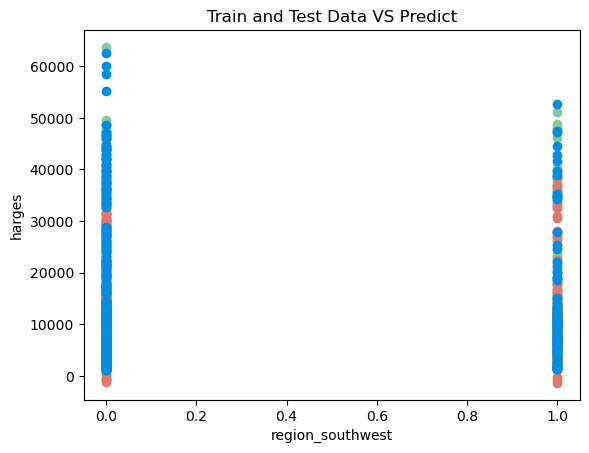

In [202]:
#Check for Linearity
for i in X_train.columns:
    plt.scatter(X_train[i], y_train, color="#88C999") #GREEN
    plt.scatter(X_test[i], y_pred, color="#E2756C") #REDPINK
    plt.scatter(X_test[i], y_test, color="#018DE3") #BLUE
    plt.title("Train and Test Data VS Predict")
    plt.xlabel(f"{i}")
    plt.ylabel(f"harges")
    plt.show()